# **Tunability of bound states through non-local couplings**
In this notebook, we will explore how the spatial properties of qubit-photon bound states in the extended SSH model can be tuned replacing the local light-matter coupling in the hamiltonian by a *non-local* interaction. This approach can be made through the introduction of the so-called *giant atoms*, which are quantum emitters that couple simultaneously to various lattice sites. Labeling by $a^\dagger_j$ ($b^\dagger_j$) the creation operator of the site of the unit cell $j$ belonging to the sublattice A (B), we will consider an interaction hamiltonian of the form:
\begin{equation}
    \mathcal{H}_\text{int} = \left(g_1 a_0^\dagger+g_2 b_0^\dagger+g_3a_1^\dagger\right)\sigma_{eg} + \text{H.c.}\;,
\end{equation}
where $j=0$ is a unit cell in the lattice bulk. Diagonalizing the model hamiltonian with this interaction, we explore qualitative behaviour of the bound states behaviour by tuning the non-local coupling constants $(g_1,g_2,g_3)$ in different ways.

In [5]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

def BS_Giant_Atom(t1, t2, r1, r2, g, Delta, N_cells, coupling):
    
    # We start by builing the bath hamiltonian
    
    M = 2*N_cells
    H = np.zeros( (M+1, M+1) )
    H_b = np.zeros( (M, M) )
    
    
    for i in range(M-3):
        
      #  np.random.seed(123456)
        
        if i%2 == 0:
        
            H_b[i, i+1] = t1 
            H_b[i, i+3] = r1 
            
            
            # Impose hermiticity
            H_b[i+1, i], H_b[i+3, i] = H_b[i, i+1], H_b[i, i+3]
            H_b[i+2,i] = H_b[i, i+2]
            
        else:
            
            H_b[i, i+1] = t2
            H_b[i, i+3] = r2
           
            # Impose hermiticity
            H_b[i+1, i], H_b[i+3, i] = H_b[i, i+1], H_b[i, i+3]
            H_b[i+2,i] = H_b[i, i+2]
            
    # Regarding the right edge:
    
    H_b[M-3, M-2] = t2 
    H_b[M-2, M-1] = t1 
    H_b[M-2, M-3], H_b[M-1, M-2] = H_b[M-3, M-2], H_b[M-2, M-1]

    em = np.zeros((M+1))
    
    # Quantum emitter excited energy
    em[0] = Delta

    # Giant atom couplings
    if coupling == 'AA':
         
         em[N_cells-1] = g            # Sublattice A
         em[N_cells+1] = g            # Sublattice A

    if coupling =='AB':  
         
         em[N_cells-1] = g            # Sublattice A
         em[N_cells] = g              # Sublattice B
         
    H[0, :], H[:, 0] = em, em
    H[1:, 1:] = H_b

    omega, C = LA.eigh(H)
    BS_index = np.argmax(abs(C[0,:])**2)

    return C[:, BS_index]

As an example, let's plot the bound state wavefunction when the giant atom is coupled to two sites belonging to the sublattice A.

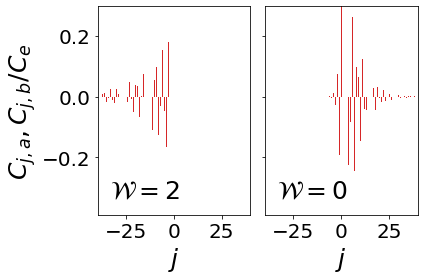

In [6]:
# Let's evaluate the function at the 4 points of interest of the parameter
# space

N_cells = 300

# Find BS with Delta 

Delta = 0

u_r = BS_Giant_Atom(1, 1, 0.5, 0.5+0.3, 0.2, Delta, N_cells, 'AA')
u_d = BS_Giant_Atom(1, 1, 0.5-0.2339, 0.5, 0.2, Delta, N_cells, 'AA')

indices_a = np.arange(1, 2*N_cells, 2)
indices_b = 1 + indices_a

Cb_r = np.take(u_r, indices_b)/LA.norm(u_r[1:])
Ca_r = np.take(u_r, indices_a)/LA.norm(u_r[1:])
Cb_d = np.take(u_d, indices_b)/LA.norm(u_d[1:])
Ca_d = np.take(u_d, indices_a)/LA.norm(u_d[1:])


fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey='row')
ent = 80
a = N_sites//2 - ent
b = N_sites//2 + ent
j_vals = np.linspace(-ent, ent, len(Ca_r[a:b]))


axes[0].bar(j_vals, Ca_r[a:b], 0.4, color='C0')
axes[0].bar(j_vals + 0.5, Cb_r[a:b], 0.4, color='C3')
axes[0].set_xlim([-ent//2, ent//2])
bottom, top = axes[0].get_ylim()
axes[0].set_ylim([bottom - (top - bottom)*0.2, top])
axes[0].text(0.08, 0.08, '$\mathcal{W}=2$', transform=axes[0].transAxes, fontsize=25)
axes[0].set_ylabel('$C_{j,a}, C_{j,b}/C_e$', fontsize = 25)
axes[0].set_xlabel('$j$', fontsize = 25)

axes[1].bar(j_vals, Ca_d[a:b], 0.4, color='C0')
axes[1].bar(j_vals + 0.5, Cb_d[a:b], 0.4, color='C3')
axes[1].set_xlim([-ent//2, ent//2])
bottom, top = axes[1].get_ylim()
axes[1].set_ylim([bottom - (top - bottom)*0.2, top+0.1])
#axes[1].set_ylabel('$C_{j,a}, C_{j,b}/C_e$', fontsize = 24)
axes[1].text(0.08, 0.08, '$\mathcal{W}=0$', transform=axes[1].transAxes, fontsize=25)
axes[1].set_xlabel('$j$', fontsize = 25)

plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.tight_layout()